In [414]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
import os
import pandas as pd
from scipy import integrate
from sympy import diff
import glob
import scipy
import seaborn as sns
current_palette = sns.color_palette("muted")
import matplotlib as mpl
from pylab import cm
import matplotlib.font_manager


plt.style.use('default')
plt.rcParams.update({'figure.figsize':(5.425197, 4.0688),
                     'text.usetex': False,
                     'font.family': 'sans',
                     'font.sans-serif': 'Linux Biolinum',
                     'font.size': 14,
                     'mathtext.fontset': 'custom',
                     'mathtext.rm': 'Linux Biolinum',
                     'mathtext.it': 'Linux Biolinum:italic',
                     'mathtext.bf': 'Linux Biolinum:bold',
                     'lines.linewidth': 2.5,
                     'xtick.labelsize': 18,
                     'ytick.labelsize': 18,
                     'axes.titlesize': 18,
                     'axes.labelsize': 18,
                     'legend.frameon': True,
                     'legend.fancybox': True,
                     'legend.fontsize': 9,
                     'legend.framealpha': 0,
                     'legend.handletextpad': 0.5,
                     'legend.labelspacing': 0.2,
                     'legend.borderpad': 0.5,
                     'legend.loc': 'best',
                     'savefig.dpi': 600,
                     'pdf.compression': 9})

In [388]:
save_fig = '/Users/smoluakov/Documents/DIPLOMA/DATA_PROCCESING/CD7031/IMAGES/EPR'

In [4]:
directory = '/Users/smoluakov/Documents/DIPLOMA/EPR_DATA/30.03_CD7031/POST_SPINOZA/GENERATION'
list_of_files = sorted(os.listdir(directory))

data = pd.read_excel(directory+'/'+'generation_full.xlsx')

In [5]:
data

,X (500 points),Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
0,330.377960,0.000048,0.000001,5.411591e-07,0.000007,0.000020,1.843715e-07,0.000001,0.000022,0.000010,0.000004,0.000014,0.000002,0.000007,0.000002,8.648299e-07,0.000008,0.000002
1,330.397980,0.000055,0.000002,6.594589e-07,0.000008,0.000024,2.271610e-07,0.000001,0.000026,0.000011,0.000005,0.000017,0.000002,0.000008,0.000002,1.053034e-06,0.000010,0.000003
2,330.418030,0.000064,0.000002,8.027288e-07,0.000010,0.000028,2.795532e-07,0.000002,0.000031,0.000014,0.000006,0.000020,0.000003,0.000010,0.000003,1.280775e-06,0.000012,0.000003
3,330.438080,0.000074,0.000002,9.766268e-07,0.000012,0.000033,3.438434e-07,0.000002,0.000037,0.000016,0.000007,0.000023,0.000003,0.000012,0.000003,1.556974e-06,0.000014,0.000004
4,330.458099,0.000085,0.000003,1.187235e-06,0.000014,0.000039,4.225566e-07,0.000003,0.000043,0.000019,0.000008,0.000028,0.000004,0.000014,0.000004,1.891202e-06,0.000017,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,340.297791,-0.000779,-0.000003,-7.993921e-06,-0.000034,-0.000125,-2.129507e-06,-0.000006,-0.000139,-0.000107,-0.000025,-0.000077,-0.000015,-0.000048,-0.000015,-8.698984e-06,-0.000040,-0.000012
496,340.317841,-0.000681,-0.000002,-6.629352e-06,-0.000028,-0.000106,-1.744748e-06,-0.000005,-0.000118,-0.000090,-0.000021,-0.000065,-0.000012,-0.000041,-0.000012,-7.208218e-06,-0.000034,-0.000010
497,340.337860,-0.000596,-0.000002,-5.493257e-06,-0.000024,-0.000090,-1.428280e-06,-0.000004,-0.000100,-0.000076,-0.000017,-0.000055,-0.000010,-0.000034,-0.000010,-5.968084e-06,-0.000028,-0.000008
498,340.357910,-0.000520,-0.000002,-4.549477e-06,-0.000020,-0.000077,-1.168571e-06,-0.000003,-0.000085,-0.000064,-0.000014,-0.000047,-0.000009,-0.000029,-0.000009,-4.938730e-06,-0.000024,-0.000007


In [173]:
x = data['X (500 points)']
y_full = data.drop(['X (500 points)'], axis=1)
y_names = list(y_full.columns)
time = [1,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]

In [12]:
len(time)

17

In [10]:
len(y_names)

17

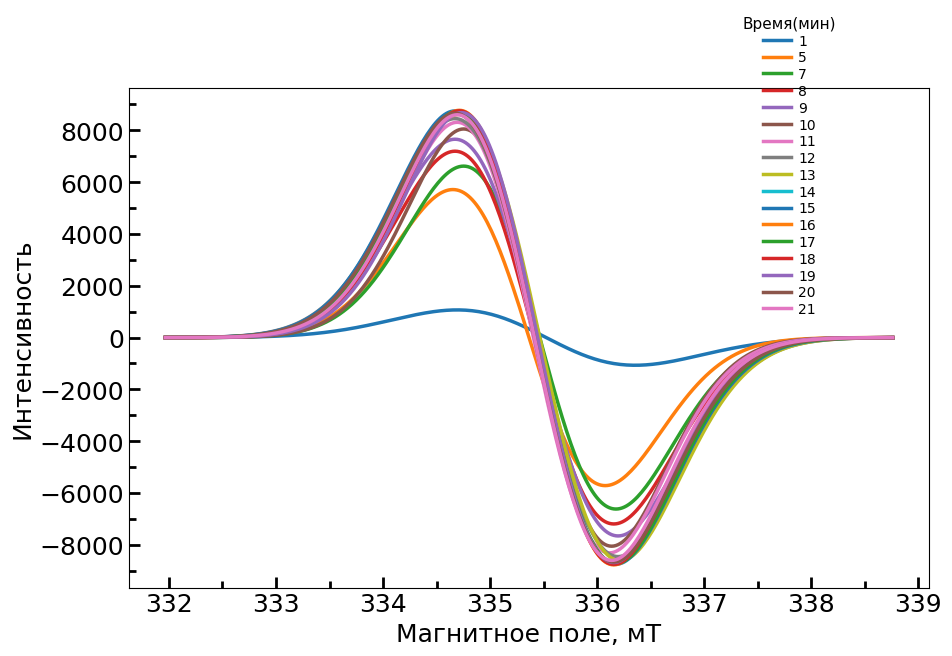

In [406]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns

fig = plt.figure(figsize=(8,5))
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])

#plt.figure(figsize=(8,5))
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
#plt.vlines(335.17, -4500,4500)

ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')


ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(2000))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1000))

ax.set_xlabel('Магнитное поле, мТ')
ax.set_ylabel('Интенсивность')


for i,name in enumerate(y_names[:]):
    filtered = lowess(y_full[name][80:420], x[80:420], is_sorted=True, frac=0.001, it=2)
    ax.plot(filtered[:,0], filtered[:,1],label=time[i])
    #plt.plot(x, y_full[name], label=name) # посчитал в экселе сколько между 335.17 и 335.38 точек
    ax.legend(title="Время(мин)",fontsize =10,title_fontsize=11, bbox_to_anchor=(0.75, 0.515))
    
#plt.savefig('generation.png', bbox_inches='tight')
plt.show()

#plt.plot(x, y_full[y_names[10]], 'r')
#plt.plot(filtered[:,0], filtered[:,1], 'b')

In [399]:
x[50:450]

50     331.365845
51     331.385864
52     331.405914
53     331.425964
54     331.445984
          ...    
445    339.281677
446    339.301697
447    339.321747
448    339.341797
449    339.361816
Name: X (500 points), Length: 400, dtype: float64

In [398]:
x[450]

339.3818664550781

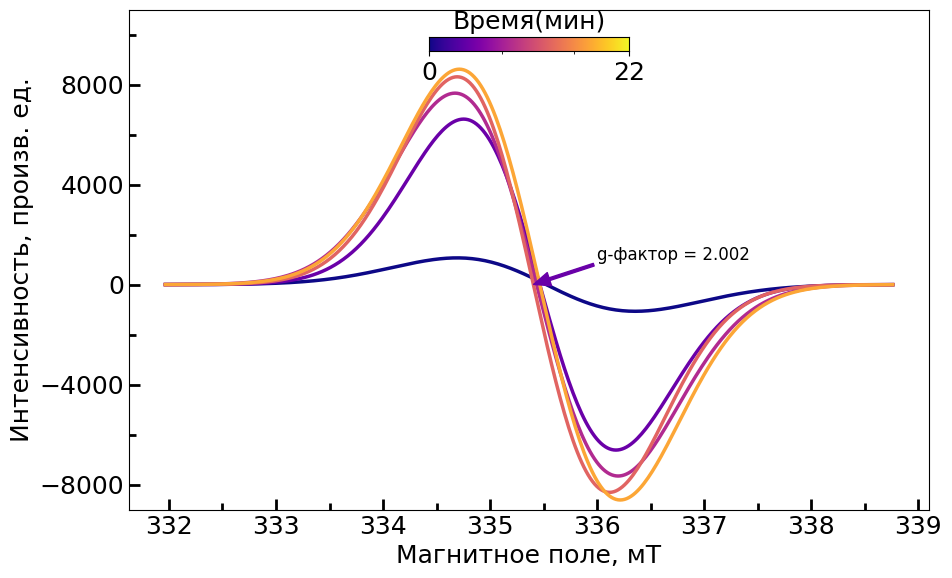

In [410]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns


from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

fig = plt.figure(figsize=(8,5))
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])

#plt.figure(figsize=(8,5))
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
#plt.vlines(335.17, -4500,4500)

ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')


ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(4000))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(2000))

ax.set_xlabel('Магнитное поле, мТ')
ax.set_ylabel('Интенсивность, произв. ед.')
#ax.set_yticks([])


for i,name in enumerate(y_names[0:-7:2]):
    #if i ==5:
    #    continue
    filtered = lowess(y_full[name][80:420], x[80:420], is_sorted=True, frac=0.00025, it=2)
    ax.plot(filtered[:,0], filtered[:,1],color=cm.plasma(i/5),label=time[i])
    #ax.legend(title="Время(мин)",fontsize =7,title_fontsize=9,bbox_to_anchor=(0.85, 0.5)) 
ax.set_ylim([-9000, 11000])
ax.annotate('g-фактор = 2.002 ', xy=(335.4, 0), xytext=(336, 1000.7),
            arrowprops=dict(color=cm.plasma(50),width=2,headwidth=10, shrink=0.01), fontsize=12)
    
cmap = plt.cm.get_cmap('plasma')
colors = cmap(np.arange(cmap.N))   
cmap = grayscale_cmap(cmap)
grayscale = cmap(np.arange(cmap.N))    
#plt.savefig('relaxation.png', bbox_inches='tight')
newax = fig.add_axes([0.375, 0.745, 0.25, 0.2], anchor='NE')
newax.imshow([colors],origin='upper', extent=[0, 22, 0.5, 2],)    
newax.axes.get_yaxis().set_visible(False)
#newax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')
newax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(8))
newax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(8))
newax.set_xticks([0,22])
newax.set_title('Время(мин)')
#plt.plot(x, y_full[y_names[10]], 'r')
#plt.plot(filtered[:,0], filtered[:,1], 'b')

plt.savefig(save_fig+'/colored_generation.pdf', bbox_inches='tight')

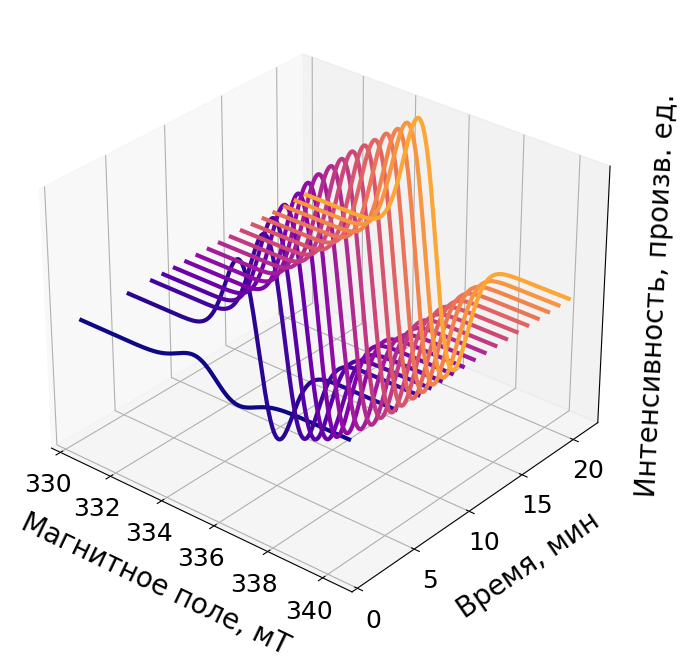

In [425]:
from matplotlib.collections import PolyCollection

fig = plt.figure(figsize=(8,8))
verts = []
ax = fig.add_subplot(projection='3d')


#for name in y_names:
ax.view_init(30, -50)
for i,name in enumerate(y_names[:]):
    filtered = lowess(y_full[name], x, is_sorted=True, frac=0.00125, it=2)
    ax.plot(filtered[:498,0], [time[i]]*len(x[:498]),filtered[:498,1],color=cm.plasma(i/20),label=name, linewidth=3)

ax.set_xlabel('Магнитное поле, мT', fontsize=20,labelpad=15)
ax.set_ylabel('Время, мин',fontsize=20,labelpad=15)
ax.set_zlabel('Интенсивность, произв. ед.',fontsize=20, labelpad=1);

ax.set_zticks([])
plt.savefig(save_fig+'/generation_3d_withot_zaxis.pdf', bbox_inches='tight')

In [72]:
y_full['Y1']

0      0.000048
1      0.000055
2      0.000064
3      0.000074
4      0.000085
         ...   
495   -0.000779
496   -0.000681
497   -0.000596
498   -0.000520
499   -0.000454
Name: Y1, Length: 500, dtype: float64

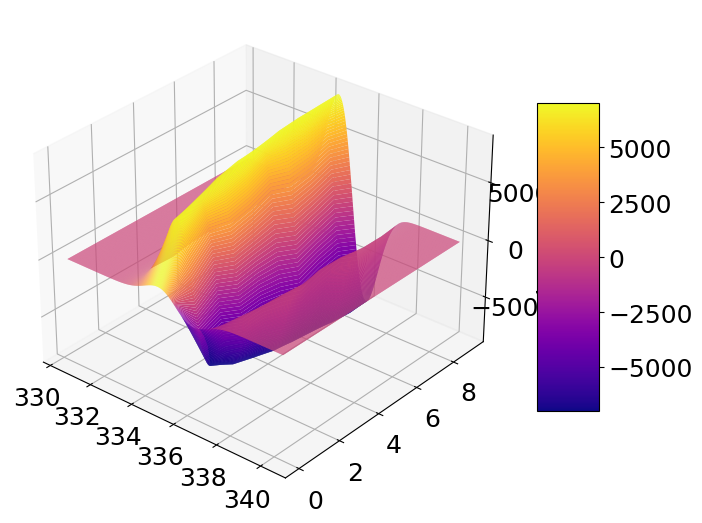

In [290]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

x = x
y = np.arange(10)
X,Y = np.meshgrid(x,y)
Z = np.zeros((len(y),len(x)))



for i in range(len(y)):
    damp = (i/float(len(y)))**2
    Z[i] = y_full[y_names[i]]
    #Z[i] = 5*damp*(1 - np.sqrt(np.abs(x/50)))
    #Z[i] += np.random.uniform(0,.1,len(Z[i]))
surf = ax.plot_surface(X, Y, Z, rstride=50, cstride=1, cmap=cm.plasma,)
        #linewidth=1, antialiased=False)

fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_zlabel("Intensity")
ax.view_init(30, -50)
plt.show()

# Realaxation

In [293]:
directory_2 = '/Users/smoluakov/Documents/DIPLOMA/EPR_DATA/30.03_CD7031/POST_SPINOZA/RELAXATION'
list_of_files_2 = sorted(os.listdir(directory_2))
data_2 = pd.read_excel(directory_2+'/'+'relaxation_full.xlsx')

In [294]:
data_2

,X (500 points),Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,...,Y24,Y25,Y26,Y27,Y28,Y29,Y30,Y31,Y32,Y33
0,330.363831,0.000021,0.000007,0.000003,0.000002,0.000028,2.823978e-07,7.251097e-07,7.995358e-07,0.000007,...,3.376765e-08,8.726602e-08,0.000019,0.000042,2.025296e-08,6.218227e-08,0.000012,2.233376e-08,0.000037,1.547898e-08
1,330.383881,0.000025,0.000009,0.000004,0.000002,0.000034,3.457032e-07,8.814785e-07,9.711684e-07,0.000008,...,4.153337e-08,1.065620e-07,0.000023,0.000048,2.491064e-08,7.586857e-08,0.000014,2.759713e-08,0.000043,1.900635e-08
2,330.403900,0.000030,0.000010,0.000005,0.000003,0.000040,4.227181e-07,1.070384e-06,1.178342e-06,0.000009,...,5.102527e-08,1.299770e-07,0.000026,0.000056,3.060364e-08,9.246229e-08,0.000016,3.405902e-08,0.000050,2.331029e-08
3,330.423950,0.000036,0.000012,0.000006,0.000004,0.000047,5.166185e-07,1.299105e-06,1.428975e-06,0.000011,...,6.265242e-08,1.584530e-07,0.000031,0.000065,3.757730e-08,1.126255e-07,0.000019,4.200928e-08,0.000058,2.857327e-08
4,330.444000,0.000042,0.000015,0.000007,0.000004,0.000055,6.308515e-07,1.575422e-06,1.731514e-06,0.000013,...,7.686312e-08,1.930067e-07,0.000036,0.000075,4.610051e-08,1.370713e-07,0.000022,5.176822e-08,0.000067,3.499449e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,340.283661,-0.000134,-0.000035,-0.000020,-0.000007,-0.000145,-2.493652e-06,-3.377821e-06,-2.536133e-06,-0.000036,...,-1.725768e-07,-2.348997e-07,-0.000075,-0.000075,-1.035071e-07,-1.126255e-07,-0.000046,-2.563441e-09,-0.000028,-3.499449e-08
496,340.303711,-0.000114,-0.000029,-0.000016,-0.000006,-0.000124,-2.054055e-06,-2.794418e-06,-2.096404e-06,-0.000031,...,-1.411534e-07,-1.930067e-07,-0.000065,-0.000065,-8.466016e-08,-9.246229e-08,-0.000040,-2.053924e-09,-0.000024,-2.857327e-08
497,340.323761,-0.000097,-0.000025,-0.000014,-0.000005,-0.000105,-1.690542e-06,-2.309904e-06,-1.731514e-06,-0.000026,...,-1.153527e-07,-1.584530e-07,-0.000056,-0.000056,-6.918556e-08,-7.584566e-08,-0.000034,-1.644188e-09,-0.000021,-2.331029e-08
498,340.343781,-0.000082,-0.000021,-0.000011,-0.000004,-0.000090,-1.390616e-06,-1.908407e-06,-1.429394e-06,-0.000022,...,-9.421628e-08,-1.300163e-07,-0.000048,-0.000048,-5.650848e-08,-6.218227e-08,-0.000030,-1.315444e-09,-0.000018,-1.900635e-08


In [336]:
x_2 = data_2['X (500 points)']
y_full_2 = data_2.drop(['X (500 points)'], axis=1)
y_names_2 = list(y_full_2.columns)

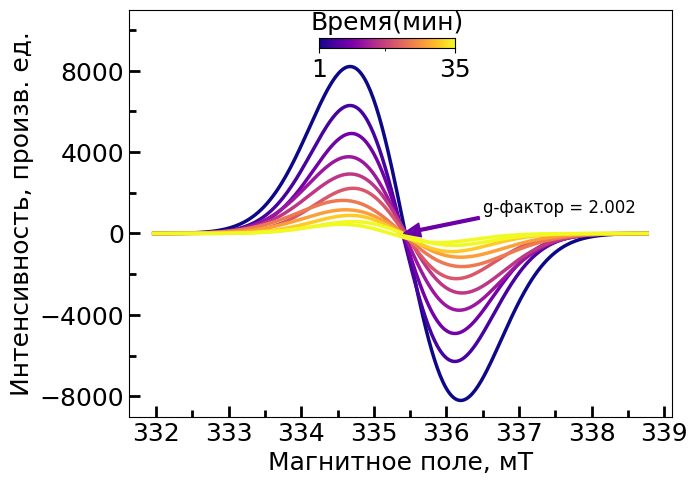

In [415]:
from statsmodels.nonparametric.smoothers_lowess import lowess

fig = plt.figure()
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])

#plt.figure(figsize=(8,5))
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
#plt.vlines(335.17, -4500,4500)

ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')


ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(4000))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(2000))

ax.set_xlabel('Магнитное поле, мТ')
ax.set_ylabel('Интенсивность, произв. ед.')
#ax.set_yticks([])


for i,name in enumerate(y_names_2[0::3]):
    #if i ==5:
    #    continue
    filtered = lowess(y_full_2[name][80:420], x_2[80:420], is_sorted=True, frac=0.00125, it=2)
    ax.plot(filtered[:,0], filtered[:,1],color=cm.plasma(i/9),label=time[i])
    #ax.legend(title="Время(мин)",fontsize =7,title_fontsize=9,bbox_to_anchor=(0.85, 0.5)) 
ax.set_ylim([-9000, 11000])
ax.annotate('g-фактор = 2.002 ', xy=(335.4, 0), xytext=(336.5, 1000.7),
            arrowprops=dict(color=cm.plasma(50),width=2,headwidth=10, shrink=0.01), fontsize=12)
    
cmap = plt.cm.get_cmap('plasma')
colors = cmap(np.arange(cmap.N))   
cmap = grayscale_cmap(cmap)
grayscale = cmap(np.arange(cmap.N))    
newax = fig.add_axes([0.35, 0.73, 0.25, 0.2], anchor='NE')
newax.imshow([colors],origin='upper', extent=[1, 35, 0.5, 3],)    
newax.axes.get_yaxis().set_visible(False)
#newax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')
newax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(17))
newax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(17.5))
newax.set_xticks([1,35])
newax.set_title('Время(мин)')
#plt.plot(x, y_full[y_names[10]], 'r')
#plt.plot(filtered[:,0], filtered[:,1], 'b')

plt.savefig(save_fig+'/relaxaxtion_colored.png', bbox_inches='tight')

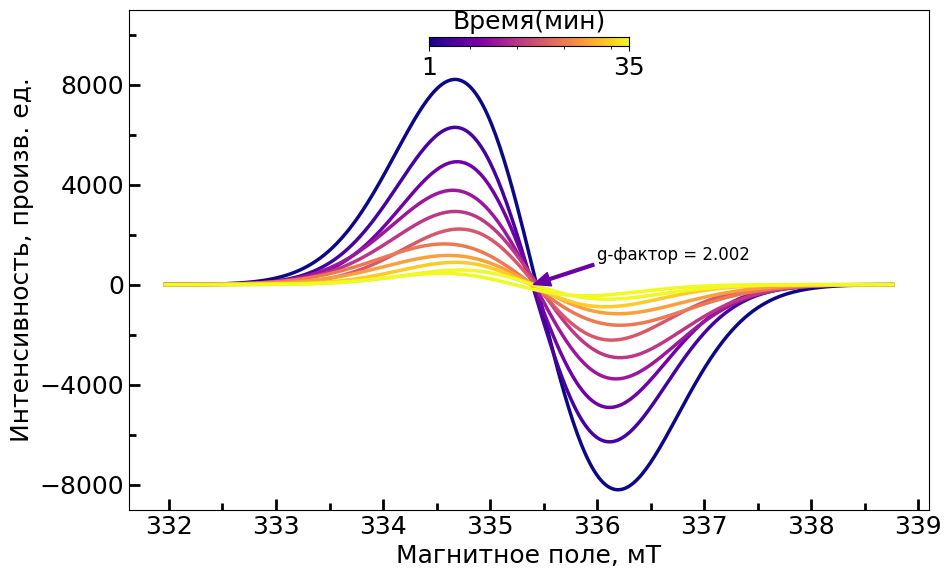

In [418]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns


from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

fig = plt.figure(figsize=(8,5))
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])

#plt.figure(figsize=(8,5))
plt.xlabel('Magnetic Field')
plt.ylabel('Intensity')
#plt.vlines(335.38, -7500,7500)
#plt.vlines(335.17, -4500,4500)

ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')


ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(4000))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(2000))

ax.set_xlabel('Магнитное поле, мТ')
ax.set_ylabel('Интенсивность, произв. ед.')
#ax.set_yticks([])


for i,name in enumerate(y_names_2[0::3]):
    #if i ==5:
    #    continue
    filtered = lowess(y_full_2[name][80:420], x_2[80:420], is_sorted=True, frac=0.00125, it=2)
    ax.plot(filtered[:,0], filtered[:,1],color=cm.plasma(i/9),label=time[i])
    #ax.legend(title="Время(мин)",fontsize =7,title_fontsize=9,bbox_to_anchor=(0.85, 0.5)) 
ax.set_ylim([-9000, 11000])
ax.annotate('g-фактор = 2.002 ', xy=(335.4, 0), xytext=(336, 1000.7),
            arrowprops=dict(color=cm.plasma(50),width=2,headwidth=10, shrink=0.01), fontsize=12)
    
cmap = plt.cm.get_cmap('plasma')
colors = cmap(np.arange(cmap.N))   
cmap = grayscale_cmap(cmap)
grayscale = cmap(np.arange(cmap.N))    
#plt.savefig('relaxation.png', bbox_inches='tight')
newax = fig.add_axes([0.375, 0.745, 0.25, 0.2], anchor='NE')
newax.imshow([colors],origin='upper', extent=[1, 35, 0.5, 2],)    
newax.axes.get_yaxis().set_visible(False)
#newax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')
newax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(8))
newax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(8))
newax.set_xticks([1,35])
newax.set_title('Время(мин)')
#plt.plot(x, y_full[y_names[10]], 'r')
#plt.plot(filtered[:,0], filtered[:,1], 'b')

plt.savefig(save_fig+'/colored_relaxation.pdf', bbox_inches='tight')

In [319]:
y_full_2

,Y1,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,...,Y24,Y25,Y26,Y27,Y28,Y29,Y30,Y31,Y32,Y33
0,0.000021,0.000002,0.000028,2.823978e-07,7.251097e-07,7.995358e-07,0.000007,0.000012,0.000002,5.736629e-08,...,3.376765e-08,8.726602e-08,0.000019,0.000042,2.025296e-08,6.218227e-08,0.000012,2.233376e-08,0.000037,1.547898e-08
1,0.000025,0.000002,0.000034,3.457032e-07,8.814785e-07,9.711684e-07,0.000008,0.000014,0.000003,7.074059e-08,...,4.153337e-08,1.065620e-07,0.000023,0.000048,2.491064e-08,7.586857e-08,0.000014,2.759713e-08,0.000043,1.900635e-08
2,0.000030,0.000003,0.000040,4.227181e-07,1.070384e-06,1.178342e-06,0.000009,0.000016,0.000003,8.713064e-08,...,5.102527e-08,1.299770e-07,0.000026,0.000056,3.060364e-08,9.246229e-08,0.000016,3.405902e-08,0.000050,2.331029e-08
3,0.000036,0.000004,0.000047,5.166185e-07,1.299105e-06,1.428975e-06,0.000011,0.000019,0.000004,1.072604e-07,...,6.265242e-08,1.584530e-07,0.000031,0.000065,3.757730e-08,1.126255e-07,0.000019,4.200928e-08,0.000058,2.857327e-08
4,0.000042,0.000004,0.000055,6.308515e-07,1.575422e-06,1.731514e-06,0.000013,0.000023,0.000005,1.319276e-07,...,7.686312e-08,1.930067e-07,0.000036,0.000075,4.610051e-08,1.370713e-07,0.000022,5.176822e-08,0.000067,3.499449e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.000134,-0.000007,-0.000145,-2.493652e-06,-3.377821e-06,-2.536133e-06,-0.000036,-0.000052,-0.000007,-9.963865e-07,...,-1.725768e-07,-2.348997e-07,-0.000075,-0.000075,-1.035071e-07,-1.126255e-07,-0.000046,-2.563441e-09,-0.000028,-3.499449e-08
496,-0.000114,-0.000006,-0.000124,-2.054055e-06,-2.794418e-06,-2.096404e-06,-0.000031,-0.000044,-0.000006,-8.170601e-07,...,-1.411534e-07,-1.930067e-07,-0.000065,-0.000065,-8.466016e-08,-9.246229e-08,-0.000040,-2.053924e-09,-0.000024,-2.857327e-08
497,-0.000097,-0.000005,-0.000105,-1.690542e-06,-2.309904e-06,-1.731514e-06,-0.000026,-0.000038,-0.000005,-6.694336e-07,...,-1.153527e-07,-1.584530e-07,-0.000056,-0.000056,-6.918556e-08,-7.584566e-08,-0.000034,-1.644188e-09,-0.000021,-2.331029e-08
498,-0.000082,-0.000004,-0.000090,-1.390616e-06,-1.908407e-06,-1.429394e-06,-0.000022,-0.000032,-0.000004,-5.481771e-07,...,-9.421628e-08,-1.300163e-07,-0.000048,-0.000048,-5.650848e-08,-6.218227e-08,-0.000030,-1.315444e-09,-0.000018,-1.900635e-08


In [338]:
time_relax = np.linspace(1, 35, 33)
len(time_relax)

33

In [339]:
len(y_names_2)

33

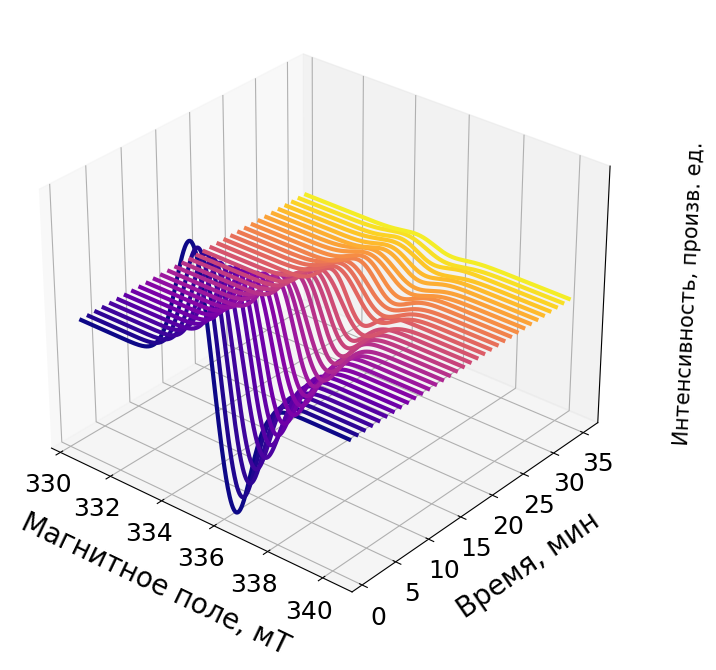

In [424]:
from matplotlib.collections import PolyCollection


fig = plt.figure(figsize=(8,8))
verts = []
ax = fig.add_subplot(projection='3d')
#for name in y_names:
ax.view_init(30, -50)
for i,name in enumerate(y_names_2[:]):
    filtered = lowess(y_full_2[name], x_2, is_sorted=True, frac=0.00125, it=2)
    ax.plot(filtered[:498,0], [time_relax[i]]*len(x_2[:498]),filtered[:498,1],color=cm.plasma(i/33),label=name, linewidth=3)
    #ax.plot(x_2[6:-21],  [i]*len(x_2[6:-21]),y_full_2[name][6:-21],)

ax.set_xlabel('Магнитное поле, мT', fontsize=20,labelpad=15)
ax.set_ylabel('Время, мин',fontsize=20,labelpad=15)
ax.set_zlabel('Интенсивность, произв. ед.',fontsize=15, labelpad=15);
ax.set_zticks([])

plt.savefig(save_fig+'/relaxation_3d_withot_zaxis.pdf', bbox_inches='tight')

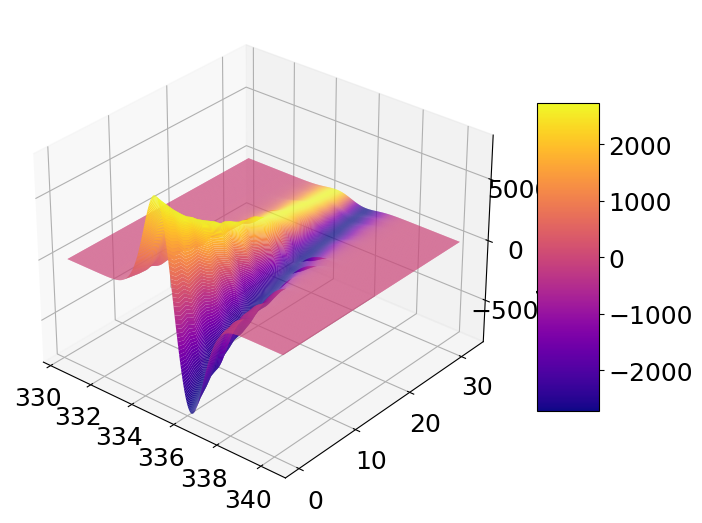

In [372]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

x = x_2
y = np.arange(33)
X,Y = np.meshgrid(x,y)
Z = np.zeros((len(y),len(x)))



for i in range(len(y)):
    damp = (i/float(len(y)))**2
    Z[i] = y_full_2[y_names_2[i]]
    #Z[i] = 5*damp*(1 - np.sqrt(np.abs(x/50)))
    #Z[i] += np.random.uniform(0,.1,len(Z[i]))
surf = ax.plot_surface(X, Y, Z, rstride=50, cstride=1, cmap=cm.plasma,)
        #linewidth=1, antialiased=False)

fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_zlabel("Intensity")
ax.view_init(30, -50)
plt.show()

In [341]:
path = "/Users/smoluakov/Documents/DIPLOMA/EPR_DATA/30.03_CD7031/POST_SPINOZA/double_integration/double_integration_full.xlsx"
data = pd.read_excel(path)

In [342]:
doub_int = []
for column in data.columns[1:]:
    doub_int.append(np.max(data[column]))

In [369]:
doub_int


[19590.626953125,
 17026.134765625,
 15180.828125,
 13475.875,
 14110.71875,
 10656.333984375,
 10238.6806640625,
 9289.6435546875,
 9560.89453125,
 9004.6240234375,
 7625.5400390625,
 6080.04443359375,
 7167.93212890625,
 6814.34326171875,
 4663.9921875,
 4628.69775390625,
 4133.4873046875,
 3587.05712890625,
 4519.21142578125,
 2217.249755859375,
 3235.147216796875,
 3006.73046875,
 2633.121826171875,
 1914.11669921875,
 1800.0443115234375,
 2049.864501953125,
 1934.646484375,
 1148.03759765625,
 1050.3822021484375,
 1258.896240234375,
 830.2405395507812,
 1121.7562255859375,
 581.2059936523438]

In [343]:
len(doub_int)

33

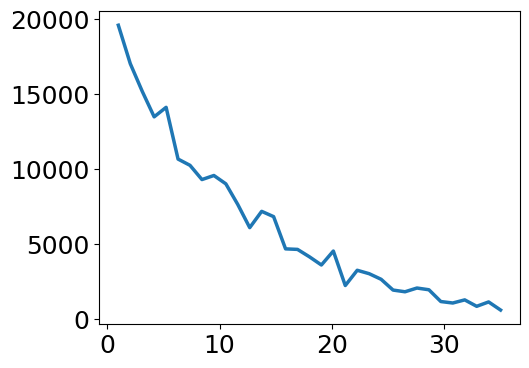

In [344]:
plt.plot(time_relax, doub_int)

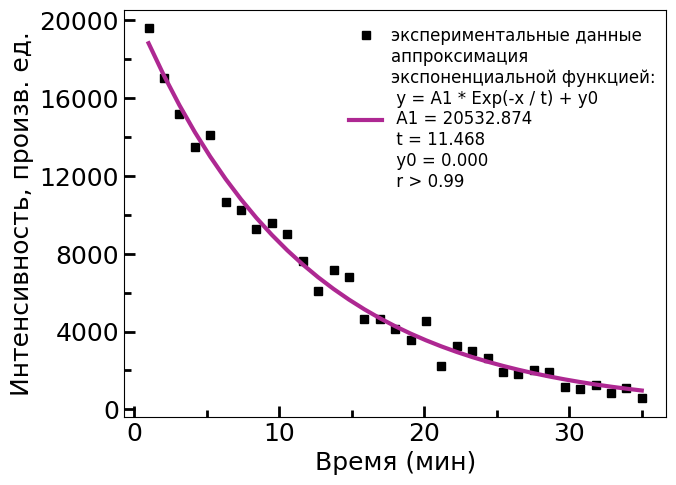

In [387]:
def exponenial_func_1(x, a, b, c):
    return a*np.exp(x/(-b))+c

popt, pcov = scipy.optimize.curve_fit(exponenial_func_1, time_relax, doub_int, bounds=(0, [25000, 100, 1000000]))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(4000))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(2000))

ax.set_xlabel('Время (мин)')
ax.set_ylabel('Интенсивность, произв. ед.')
#ax.set_yticks([])

ax.plot(time_relax,doub_int,'s',markersize=6,markerfacecolor='black',markeredgecolor='black',label='экспериментальные данные')
ax.plot(time_relax, exponenial_func_1(time_relax, *popt),linewidth= 3, color=cm.plasma(100),
        label='аппроксимация\nэкспоненциальной функцией:\n y = A1 * Exp(-x / t) + y0 \n A1 = %5.3f\n t = %5.3f\n y0 = %5.3f\n r > 0.99' % tuple(popt))    

#ax.text(10,0.25,'(б)',fontsize=25)
#ax.set_title('Кинетика изменения оптической плотности в полосе поглощения дикатион-радикала в процессе анодной поляризации', pad=14, fontsize=20 )
ax.legend(bbox_to_anchor=(1.01, 1),fontsize =12,title_fontsize=14)
plt.savefig(save_fig+'/expfit_relax_rus_color_emptyY.pdf', transparent=False, bbox_inches='tight') 
plt.show()

In [ ]:
time_relax